# Mask detection using VGG19

In [1]:
# Imports
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.models import load_model

In [2]:
# We are using Haar Cascade Model trained to detect faces in an image.
face_model = cv2.CascadeClassifier('Data and Dependencies/haarcascade/haarcascade_frontalface_default.xml')

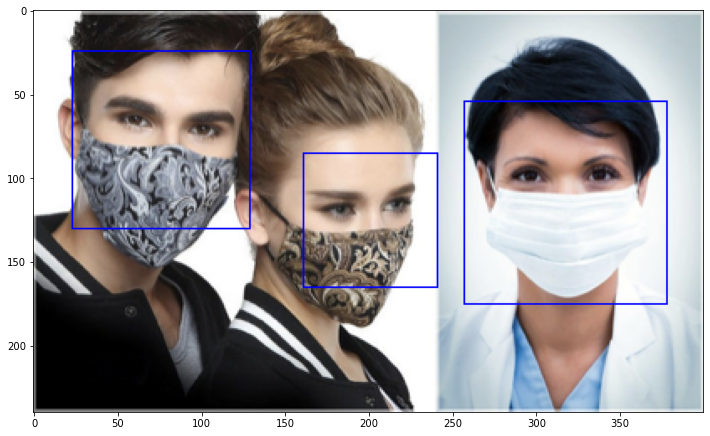

In [3]:
# testing on a image
img = cv2.imread('Data and Dependencies/archive/maksssksksss81.png')
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

# Returns a list of (x,y,w,h) tuples delimiting the faces on the image
faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) 

# Colored output image
out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 

# Plotting the rectangles delimiting the faces on the image
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

In [4]:
# keras imports
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# Load train and test set
train_dir = 'Data and Dependencies/Face Mask Dataset/Train'
test_dir = 'Data and Dependencies/Face Mask Dataset/Test'
val_dir = 'Data and Dependencies/Face Mask Dataset/Validation'

In [6]:
# Data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [7]:
# VGG-19 convolutional neural network (19 layers deep)
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
# Building NN model architecture
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 16386     
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [8]:
#Compile model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [9]:
# Train model with augmented data
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//32)

C:\Users\thibo\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
9/9 [==============================] - 10s 1s/step - loss: 0.6406 - accuracy: 0.6576
Epoch 2/20
9/9 [==============================] - 9s 943ms/step - loss: 0.2684 - accuracy: 0.8999
Epoch 3/20
9/9 [==============================] - 9s 1000ms/step - loss: 0.2524 - accuracy: 0.9059
Epoch 4/20
9/9 [==============================] - 9s 970ms/step - loss: 0.1086 - accuracy: 0.9764
Epoch 5/20
9/9 [==============================] - 9s 989ms/step - loss: 0.1131 - accuracy: 0.9695
Epoch 6/20
9/9 [==============================] - 9s 964ms/step - loss: 0.1094 - accuracy: 0.9674
Epoch 7/20
9/9 [==============================] - 10s 1s/step - loss: 0.0801 - accuracy: 0.9736
Epoch 8/20
9/9 [==============================] - 10s 1s/step - loss: 0.0839 - accuracy: 0.9879
Epoch 9/20
9/9 [==============================] - 10s 1s/step - loss: 0.1059 - accuracy: 0.9582
Epoch 10/20
9/9 [==============================] - 9s 1s/step - loss: 0.1010 - accuracy: 0.9528
Epoch 11/20
9/9 [============

In [10]:
model.evaluate_generator(test_generator)
#98% accuracy on test data.

C:\Users\thibo\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.06530847400426865, 0.9737499952316284]

# Save/Load model

In [11]:
#model.save('masknet.h5')
#model = load_model('masknet.h5')


[[0.07103691 0.927845  ]]


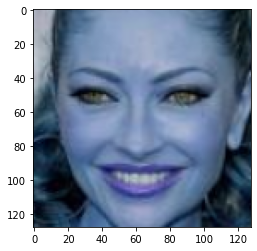

In [12]:
# Testing model on random image
sample_mask_img = cv2.imread('Data and Dependencies/Face Mask Dataset/Test/WithoutMask/1565.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

result = model.predict(sample_mask_img)
print(result)

In [13]:
#0 = Mask; 1= No mask
#0 = Green; 1= Red
mask_label = {0:'MASK',1:'NO MASK'}
color_label = {0:(0,255,0),1:(255,0,0)}

In [14]:
print(mask_label[result.argmax()])

NO MASK


In [15]:
def pipeline(img):
    faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4)
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,color_label[mask_result.argmax()],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),color_label[mask_result.argmax()],1)
    return new_img
    

# Test the model on an image

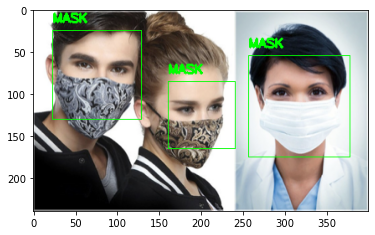

In [16]:
# Use the program on an image
img = cv2.imread('Data and Dependencies/archive/maksssksksss81.png')
output = pipeline(img)
plt.imshow(output)

# Test the model your computer camera

In [18]:
# Use the program on computer camera

def save_webcam(outPath, fps, mirror=False):
    # Capturing video from webcam:
    cap = cv2.VideoCapture(0)

    currentFrame = 0

    # Get current width of frame
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)  # float
    # Get current height of frame
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    out = cv2.VideoWriter(outPath, fourcc, fps, (int(width), int(height)))

    while (cap.isOpened()):

        # Capture frame-by-frame
        ret, frame = cap.read()

        if ret == True:
            if mirror == True:
                # Mirror the output video frame
                frame = cv2.flip(frame, 1)


            frame = pipeline(frame)

            # Saves for video
            out.write(frame)

            # Display the resulting frame
            cv2.imshow('frame', frame)
        else:
            break

        if cv2.waitKey(1) & 0xFF == ord('q'):  # if 'q' is pressed then quit
            break

        # To stop duplicate images
        currentFrame += 1

    # When everything done, release the capture
    cap.release()
    out.release()
    cv2.destroyAllWindows()


def main():
    save_webcam('output.avi', 30.0,mirror=True)

if __name__ == '__main__':
    main()